<font size="5"><font face="bernard mt condensed"><strong> NAMA  : FEBI RUSMIATI<br>
<font size="5"><font face="bernard mt condensed"><strong> NIM   : 09011181722025<br>
<font size="5"><font face="bernard mt condensed"><strong>KELAS : SK5A REG

   <div class="alert alert-info">
   <font size="10"><font face="algerian"> "IMPLEMENTASI LOGIKA FUZZY MAMDANI PADA SISTEM REKOMENDASI PERPANJANGAN KONTRAK KERJA"

In [38]:
#memanggil library yang akan kita gunakan
#skfuzzy adalah library fuzzy logic pada python yang bekerja dengan numpy array
import numpy as np  #import numpy gunkan np untuk menggunakan library ini
import skfuzzy as fuzz #import library fuzzy gunakan fuzz untuk menggunkaan library ini
from skfuzzy import control as ctr #panggi library control dari skfuzzy gunakan ctr untuk menggunakan library ini
import matplotlib.pyplot as plt #panggi library matplotlib.pyplot dari skfuzzy gunakan plt untuk menggunakan library ini

        Teknologi informasi yang semakin berkembang seperti perkembangan perangkat keras serta perangkat lunak, dan perkembangan tersebut berdampak positif. Dengan perkembangan ini, diharapkan dapat menggambil keputusan untuk menentukan kebijakan dapat berlangsung secara efektif dan efisien. Maka diperlukan adanya sistem yang dapat membantu dalam pengambilan keputusan perpanjang kontrak kerja. 

<div class="alert alert-info">
 <font size='5'>  Fuzzifikasi

        Proses fuzzifikasi, yaitu mengubah nilai dari himpunan tegas ke nilai fuzzy. Pada proses ini langkah awal kita menentukan variabel fuzzy dan himpunanya. Pada proses metode mamdani, baik variabel input maupun variabel output dibagi menjadi satu atau lebih himpunan fuzzy.

Pada sistem fuzzy ini terdapat 4 variabel input, yaitu :

### 1. Variabel Absensi

| Nilai Linguistik | Absensi dalam 1 Tahun |
|------------------|-----------------------|
|Kehadiran Kurang  |      10% - 80%        |
|Selalu Hadir      |      20% - 100%       |

Adapun kurva yang terbentuk untuk menentukan fungsi keanggotaan pada variabel absensi dapat dilihat pada gambar dibawah ini :

In [39]:
#membuat variabel fuzzy
Absensi = ctr.Antecedent(np.arange(0, 101, 1), 'Absensi')

E:\Anaconda\FILE\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


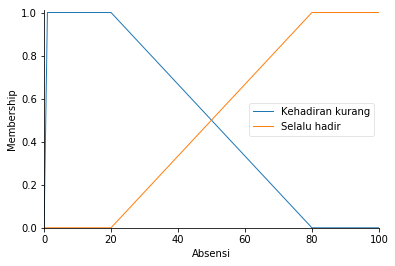

In [40]:
#membuat membership function untuk variabel absensi
Absensi['Kehadiran kurang'] = fuzz.trapmf(Absensi.universe, (0, 1, 20, 80))
Absensi['Selalu hadir'] = fuzz.trapmf(Absensi.universe, (20, 80, 101, 101))

Absensi.view() #mencetak membership function absensi dalam satu grafik

### 2. Variabel Prestasi

| Nilai Linguistik      | Penjualan dalam 1 Bulan |
|-----------------------|-------------------------|
|Tidak Mencapai Target  |      <3                 |
|Mencapai               |      3                  |
|Melampaui Target       |       >3                |

Adapun kurva yang terbentuk untuk menentukan fungsi keanggotaan pada variabel prestasi dapat dilihat pada gambar dibawah ini :

In [41]:
#membuat variabel fuzzy
Prestasi = ctr.Antecedent(np.arange(0, 6, 1), "Prestasi")

E:\Anaconda\FILE\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


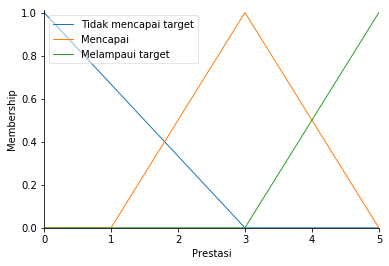

In [42]:
#membuat membership function untuk variabel prestasi
Prestasi["Tidak mencapai target"] = fuzz.trimf(Prestasi.universe, (0, 0, 3))
Prestasi["Mencapai"] = fuzz.trimf(Prestasi.universe, (1, 3, 5))
Prestasi["Melampaui target"] = fuzz.trimf(Prestasi.universe, (3, 5, 6))

Prestasi.view() #mencetak membership function prestasi dalam satu grafik

### 3. Variabel Kedisiplinan

| Nilai Linguistik | Ranah Nilai  |
|------------------|--------------|
|Kurang Disiplin   |0 - 4         |
|Cukup Disiplin    |1 - 9         |
|Sangat Disiplin   |6 - 10        |

Adapun kurva yang terbentuk untuk menentukan fungsi keanggotaan pada variabel kedisiplinan dapat dilihat pada gambar dibawah ini :

In [43]:
#membuat variabel fuzzy
Kedisiplinan = ctr.Antecedent(np.arange(0, 11, 1), "Kedisiplinan")

E:\Anaconda\FILE\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


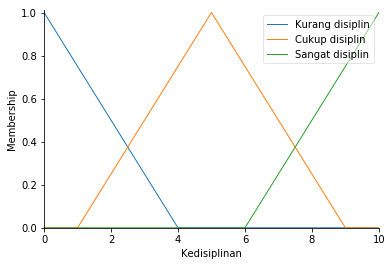

In [44]:
#membuat membership function untuk variabel kedisiplinan
Kedisiplinan["Kurang disiplin"] = fuzz.trimf(Kedisiplinan.universe, (0, 0, 4))
Kedisiplinan["Cukup disiplin"] = fuzz.trimf(Kedisiplinan.universe, (1, 5, 9))
Kedisiplinan["Sangat disiplin"] = fuzz.trimf(Kedisiplinan.universe, (6, 10, 10))

Kedisiplinan.view() #mencetak membership function kedisiplinan dalam satu grafik


### 4. Variabel Implementasi Lapangan

| Nilai Linguistik   | Ranah Nilai |
|--------------------------------  |
| Kurang Komunikatif | 0 - 4       |
| Cukup Komunikatif  | 1 - 9       |
| Sangat Komunikatif | 6 - 10      |

Adapun kurva yang terbentuk untuk menentukan fungsi keanggotaan pada variabel implementasi lapangan dapat dilihat pada gambar dibawah ini :

In [45]:
#membuat variabel fuzzy
Implementasi = ctr.Antecedent(np.arange(0, 11, 1), "Implementasi")

E:\Anaconda\FILE\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


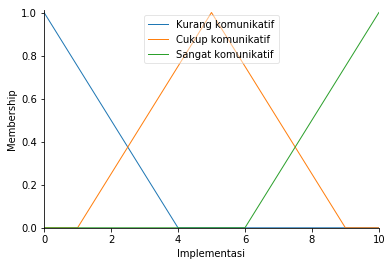

In [46]:
#membuat membership function untuk variabel implementasi
Implementasi["Kurang komunikatif"] = fuzz.trimf(Implementasi.universe, (0, 0, 4))
Implementasi["Cukup komunikatif"] = fuzz.trimf(Implementasi.universe, (1, 5, 9))
Implementasi["Sangat komunikatif"] = fuzz.trimf(Implementasi.universe, (6, 10, 11))

Implementasi.view() #mencetak membership function implementasi dalam satu grafik

### Variabel Output

Dari keempat input tersebuat, menghasilkan Output Untuk variabel output himpunannya dapat dilihat berikut ini : 

| Nilai Linguistil     | Ranah Nilai |
|------------------    |-------------|
| Sedikit Diperpanjang | 0 - 4       |
| Sedang Diperpanjang  | 6 - 8       |
| Sangat Diperpanjang  | 6 - 10      |

Adapun kurva yang terbentuk untuk menentukan fungsi keanggotaan pada variabel output dapat dilihat pada gambar dibawah ini :

In [47]:
#membuat variabel fuzzy, 3 sebagi input dan 1 output
Output = ctr.Consequent(np.arange(0, 11, 1), 'Output')

E:\Anaconda\FILE\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


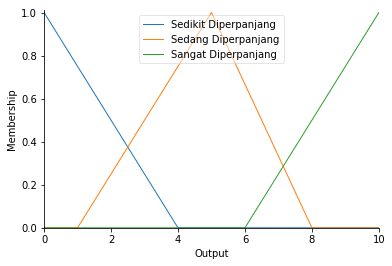

In [48]:
#membuat membership function untuk variabel Output
Output["Sedikit Diperpanjang"] = fuzz.trimf(Output.universe, (0, 0, 4))
Output["Sedang Diperpanjang"] = fuzz.trimf(Output.universe, (1, 5, 8))
Output["Sangat Diperpanjang"] = fuzz.trimf(Output.universe, (6, 10, 11))

Output.view() #mencetak membership function output dalam satu grafik

### Dalam kurva fungsi keanggotaan didapat persamaan fungsi keanggotaan setiap variabel sebagai berikut :
        
## Absensi
persamaan fungsi keanggotaan untuk variabel absensi ditunjukan sebagai berikut :

$Kehadiran Kurang [x] = 
\left\{|
    \begin{array}{ll}
       1 & \mbox{; } 1 \leq x \leq 20 \\
       {x-20 \over 80-20} & \mbox{; } 20 < x \leq 80 \\
       0 & \mbox{; } x > 80
    \end{array}
\right.$
    
$Selalu Hadir [x] = 
\left\{|
    \begin{array}{ll}
       0 & \mbox{; } 1 \leq x \leq 20 \\
       {80-x \over 80-20} & \mbox{; } 20 < x \leq 80 \\
       1 & \mbox{; } x > 80
    \end{array}
\right.$

## Prestasi
Persamaan fungsi keanggotaa untuk variabel prestasi ditunjukkan sebagai berikut :

$Tidak Mencapai Target [x] = 
\left\{|
    \begin{array}{ll}
       1 & \mbox{; } x \leq 1 \\
       {x-1 \over 3-1} & \mbox{; } 1 < x \leq 3 \\
       0 & \mbox{; } 3 < x \leq 0
    \end{array}
\right.$

$Mencapai Target [x] = 
\left\{|
    \begin{array}{ll}
       0 & \mbox{; } x \leq 1 \\
       {x-1 \over 3-1} & \mbox{; } 1 < x \leq 3 \\
       {3-x \over 5-3} & \mbox{; } 3 < x \leq 5 \\
       1 & \mbox{; } x > 5
    \end{array}
\right.$

$Melampaui Target [x] = 
\left\{|
    \begin{array}{ll}
       0 & \mbox{; } x \leq 3 \\
       {5-x \over 5-3} & \mbox{; } 3 < x \leq 5 \\
       1 & \mbox{; } 5 < x \leq 0
    \end{array}
\right.$

## Kedisiplinan 

$Kurang Disiplin [x] = 
\left\{|
    \begin{array}{ll}
       1 & \mbox{; } x \leq 1 \\
       {x-1 \over 4-1} & \mbox{; } 1 < x \leq 4 \\
       0 & \mbox{; } 4 < x \leq 0
    \end{array}
\right.$

$Cukup Disiplin [x] = 
\left\{|
    \begin{array}{ll}
       0 & \mbox{; } x \leq 1 \\
       {x-1 \over 5-1} & \mbox{; } 1 < x \leq 5 \\
       {5-x \over 9-1} & \mbox{; } 1 < x \leq 9 \\
       1 & \mbox{; } x > 9
    \end{array}
\right.$

$Sangat Disiplin [x] = 
\left\{|
    \begin{array}{ll}
       0 & \mbox{; } x \leq 6 \\
       {6-x \over 10-6} & \mbox{; } 6 < x \leq 10 \\
       1 & \mbox{; } 10 < x \leq 0
    \end{array}
\right.$

## Implementasi Lapangan

$Kurang komunikatif [x] = 
\left\{|
    \begin{array}{ll}
       1 & \mbox{; } x \leq 1 \\
       {x-1 \over 4-1} & \mbox{; } 1 < x \leq 4 \\
       0 & \mbox{; } 4 < x \leq 0
    \end{array}
\right.$

$Cukup komunikatif [x] = 
\left\{|
    \begin{array}{ll}
       0 & \mbox{; } x \leq 1 \\
       {x-1 \over 5-1} & \mbox{; } 1 < x \leq 5 \\
       {5-x \over 9-1} & \mbox{; } 1 < x \leq 9 \\
       1 & \mbox{; } x > 9
    \end{array}
\right.$

$Sangat komunikatif [x] = 
\left\{|
    \begin{array}{ll}
       0 & \mbox{; } x \leq 6 \\
       {6-x \over 10-6} & \mbox{; } 6 < x \leq 10 \\
       1 & \mbox{; } 10 < x \leq 0
    \end{array}
\right.$

## Output 

$Sedikit Diperpanjang [x] = 
\left\{|
    \begin{array}{ll}
       1 & \mbox{; } x \leq 1 \\
       {x-1 \over 4-1} & \mbox{; } 1 < x \leq 4 \\
       0 & \mbox{; } 4 < x \leq 0
    \end{array}
\right.$

$Sedang Diperpanjang [x] = 
\left\{|
    \begin{array}{ll}
       0 & \mbox{; } x \leq 1 \\
       {x-1 \over 5-1} & \mbox{; } 1 < x \leq 5 \\
       {5-x \over 8-5} & \mbox{; } 5 < x \leq 8 \\
       1 & \mbox{; } x > 8
    \end{array}
\right.$

$Sangat Diperpanjang [x] = 
\left\{|
    \begin{array}{ll}
       0 & \mbox{; } x \leq 6 \\
       {6-x \over 10-6} & \mbox{; } 6 < x \leq 10 \\
       1 & \mbox{; } 10 < x \leq 0
    \end{array}
\right.$

<div class="alert alert-info">
 <font size='5'> Rule Base

        Rule Base, berisi aturan – aturan secara linguistik. Aturan yang dibuat untuk menentukan rules yang akan digunakan untuk menghitung kesesuaian hasil dengan metode fuzzy mamdani, dimana aturan min-max berlaku pada metode fuzzy ini. Aturan – aturan dibentuk untuk menyatakan relasi antara input dan output. Setiap aturan merupakan suatu implikasi. Operator yang digunakan adalah operator AND dan yang memetakan antara input output adalah IF-THEN, proposisi yang mengikuti IF disebut anteseden, sedangkan proposisi yang mengikuti THEN disebut konsekuen, maka dapat dibentuk aturan – aturan seperti pada tabel berikut ini : 

| R	 | Absensi          | Prestasi              | Kedisiplinan    | Implementasi       | Output               |
|-------------------------------------------------------------------------------------------------------------|
| R1 | Selalu Hadir     | Mencapai target       | Cukup disipin   | Cukup komunikatif  | Sedang Diperpanjang  |
| R2 | Selalu Hadir     | Melampaui target      | Cukup disiplin  | Cukup komunikatif  | Sedang Diperpanjang  | 
| R3 | Selalu Hadir     | Mencapai target       | Sangat disiplin |	Sangat komunikatif | Sangat Diperpanjang  |
| R4 | Selalu Hadir     | Melampaui target      | Sangat disiplin |	Sangat komunikatif | Sangat Diperpanjang  |
| R5 | Selalu Hadir	    | Tidak mencapai target	| Cukup disiplin  |	Sangat komunikatif | Sedikit Diperpanjang |
| R6 | Selalu Hadir	    | Mencapai target	    | Sangat disiplin |	Cukup komunikatif  | Sedang Diperpanjang  |
| R7 | Selalu Hadir	    | Melampaui target	    | Cukup disiplin  | Sangat komunikatif | Sangat Diperpanjang  |
| R8 | Selalu Hadir	    | Melampaui target	    | Sangat disiplin |	Cukup komunikatif  | Sangat Diperpanjang  |
| R9 | Selalu Hadir	    | Mencapai target	    | Cukup disiplin  | Cukup komunikatif  | Sedikit Diperpanjang |
|R10 | Selalu Hadir	    | Tidak mencapai target	| Cukup disiplin  | Sangat komunikatif | Sedikit Diperpanjang |
|R11 | Selalu Hadir	    | Tidak mencapai target	| Sangat disiplin | Cukup komunikatif  | Sedikit Diperpanjang |
|R12 | Selalu Hadir	    | Tidak mencapai target	| Sangat disiplin | Sangat komunikatif | Sedikit Diperpanjang |
|R13 | Selalu Hadir	    | Tidak mencapai target	| Sangat disiplin | Sangat komunikatif | Sedikit Diperpanjang |
|R14 | Selalu Hadir	    | Mencapai target	    | Kurang disiplin | Sangat komunikatif | Sedang Diperpanjang  |
|R15 | Selalu Hadir	    | Melampaui target	    | Kurang disiplin | Cukup komunikatif  | Sedang Diperpanjang  |
|R16 | Selalu Hadir	    | Melampaui target	    | Kurang disiplin | Sangat komunikatif | Sangat Diperpanjang  |
|R17 | Selalu Hadir	    | Mencapai target	    | Cukup disiplin  | Kurang komunikatif | Sedang Diperpanjang  |
|R18 | Selalu Hadir	    | Mencapai target	    | Cukup disiplin  | Kurang komunikatif | Sedang Diperpanjang  |
|R19 | Selalu Hadir	    | Mencapai target	    | Sangat disiplin | Kurang komunikatif | Sedang Diperpanjang  |
|R20 | Selalu Hadir	    | Melampaui target	    | Sangat disiplin | Kurang komunikatif | Sangat Diperpanjang  |
|R21 | Kehadiran Kurang	| Melampaui target	    | Cukup disiplin  | Sangat komunikatif | Sedikit Diperpanjang |
|R22 | Kehadiran Kurang	| Mencapai target	    | Sangat disiplin | Sangat komunikatif | Sedang Diperpanjang  |
|R23 | Kehadiran Kurang	| Mencapai target	    | Cukup disiplin  | Sangat komunikatif | Sedikit Diperpanjang |
|R24 | Kehadiran Kurang	| Melampaui target	    | Cukup disiplin  | Cukup komunikatif  | Sedikit Diperpanjang |
|R25 | Kehadiran Kurang	| Melampaui target	    | Sangat disiplin | Sangat komunikatif | Sedang Diperpanjang  |
|R26 | Kehadiran Kurang	| Melampaui target	    | Sangat disiplin | Cukup komunikatif  | Sedang Diperpanjang  |
|R27 | Kehadiran Kurang | Melampaui target	    | Cukup disiplin  | Sangat komunikatif | Sedang Diperpanjang  |


E:\Anaconda\FILE\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd9a70d0>)

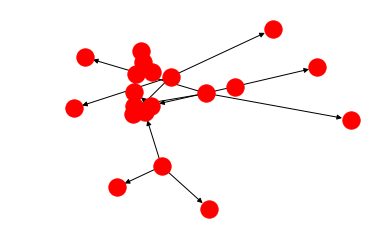

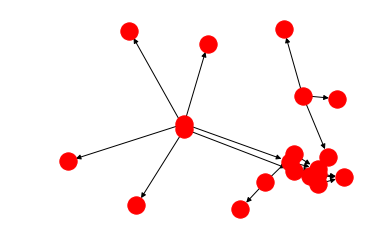

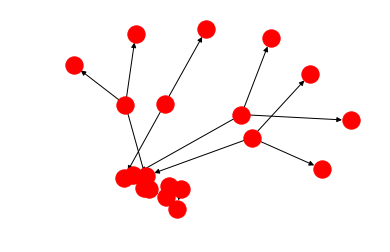

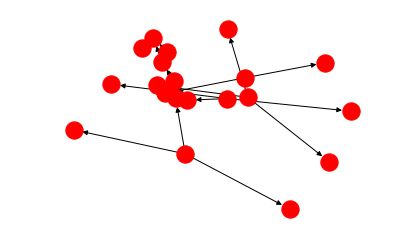

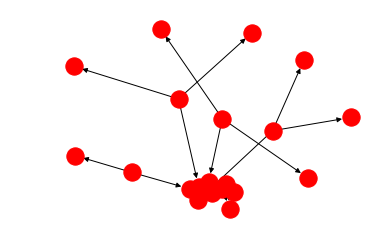

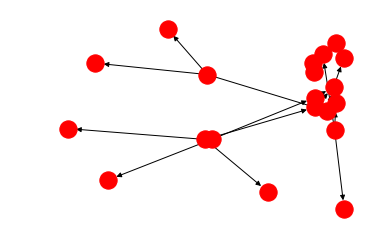

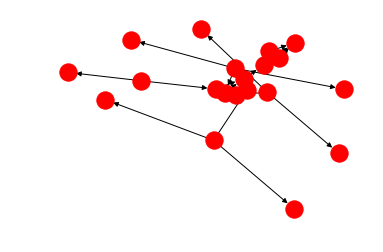

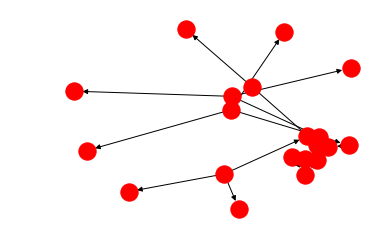

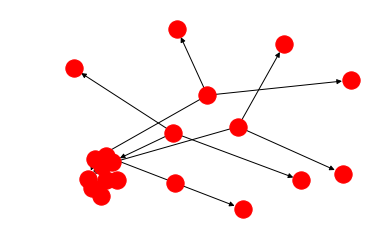

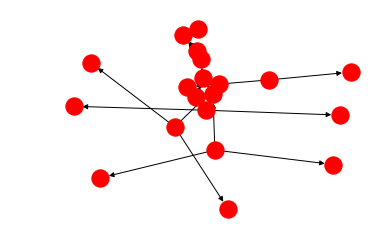

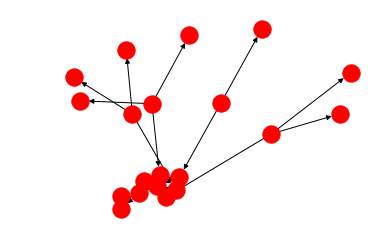

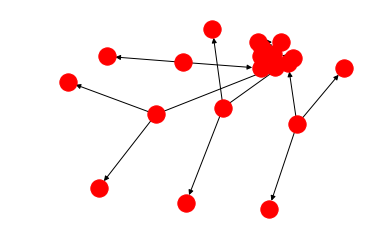

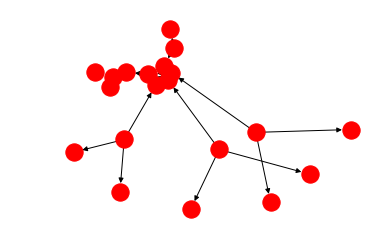

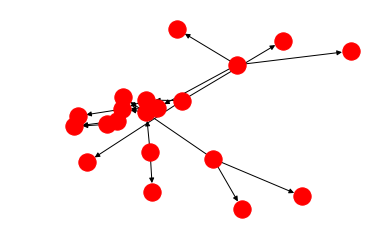

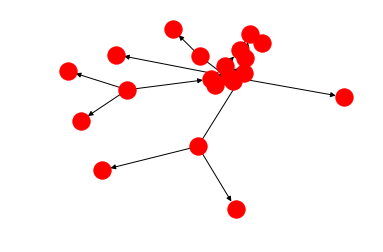

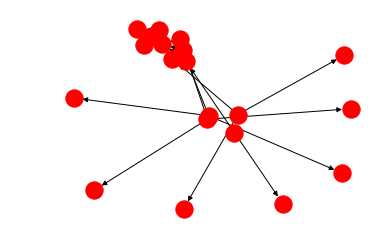

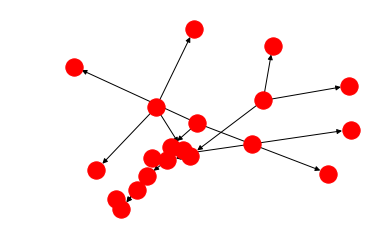

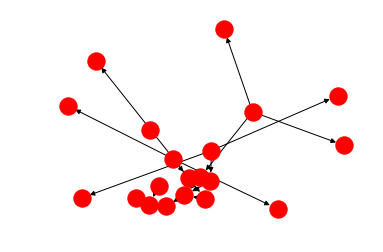

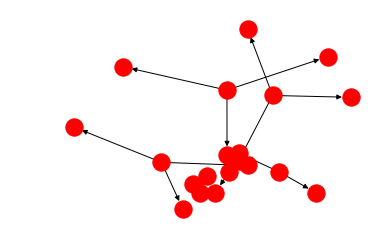

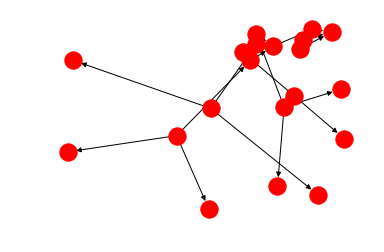

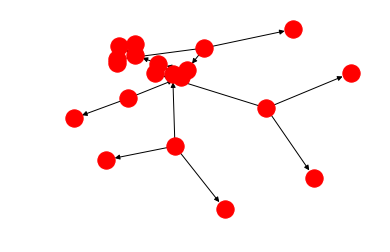

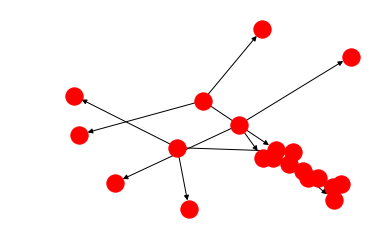

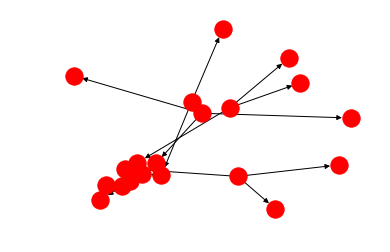

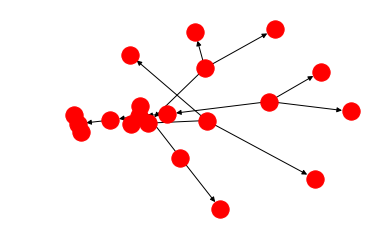

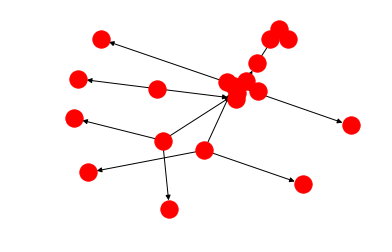

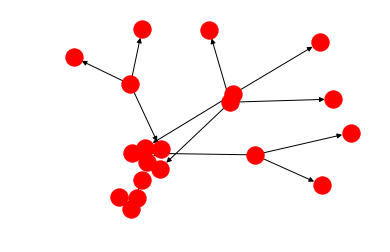

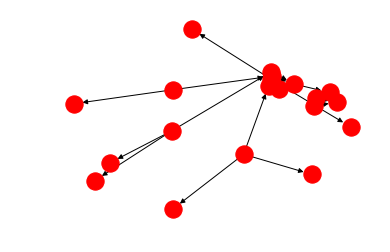

In [49]:
#membuat aturan untuk menentukan output 
#karena input ada 4 dan setiap input mempunyai tiga kondisi maka saya membuat 27
rule1 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Mencapai'] & Kedisiplinan['Cukup disiplin'] & Implementasi['Cukup komunikatif'], Output['Sedang Diperpanjang'])
rule2 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Melampaui target'] & Kedisiplinan['Cukup disiplin'] & Implementasi['Cukup komunikatif'],Output['Sedang Diperpanjang'])
rule3 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Mencapai'] & Kedisiplinan['Sangat disiplin'] & Implementasi['Sangat komunikatif'], Output['Sangat Diperpanjang'])
rule4 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Melampaui target'] & Kedisiplinan['Sangat disiplin'] & Implementasi['Sangat komunikatif'], Output['Sangat Diperpanjang'])
rule5 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Tidak mencapai target'] & Kedisiplinan['Cukup disiplin'] & Implementasi['Sangat komunikatif'], Output['Sedikit Diperpanjang'])
rule6 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Mencapai'] & Kedisiplinan['Sangat disiplin'] & Implementasi['Cukup komunikatif'], Output['Sedang Diperpanjang'])
rule7 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Melampaui target'] & Kedisiplinan['Cukup disiplin'] & Implementasi['Sangat komunikatif'], Output['Sangat Diperpanjang'])
rule8 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Melampaui target'] & Kedisiplinan['Sangat disiplin'] & Implementasi['Cukup komunikatif'], Output['Sangat Diperpanjang'])
rule9 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Mencapai'] & Kedisiplinan['Cukup disiplin'] & Implementasi['Cukup komunikatif'], Output['Sedikit Diperpanjang'])
rule10 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Tidak mencapai target'] & Kedisiplinan['Cukup disiplin'] & Implementasi['Sangat komunikatif'], Output['Sedikit Diperpanjang'])
rule11 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Tidak mencapai target'] & Kedisiplinan['Sangat disiplin'] & Implementasi['Cukup komunikatif'], Output['Sedikit Diperpanjang'])
rule12 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Tidak mencapai target'] & Kedisiplinan['Sangat disiplin'] & Implementasi['Sangat komunikatif'], Output['Sedikit Diperpanjang'])
rule13 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Tidak mencapai target'] & Kedisiplinan['Sangat disiplin'] & Implementasi['Sangat komunikatif'], Output['Sedikit Diperpanjang'])
rule14 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Mencapai'] & Kedisiplinan['Kurang disiplin'] & Implementasi['Sangat komunikatif'], Output['Sedang Diperpanjang'])
rule15 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Melampaui target'] & Kedisiplinan['Kurang disiplin'] & Implementasi['Cukup komunikatif'], Output['Sedang Diperpanjang'])
rule16 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Melampaui target'] & Kedisiplinan['Kurang disiplin'] & Implementasi['Sangat komunikatif'], Output['Sangat Diperpanjang'])
rule17 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Mencapai'] & Kedisiplinan['Cukup disiplin'] & Implementasi['Kurang komunikatif'], Output['Sedang Diperpanjang'])
rule18 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Mencapai'] & Kedisiplinan['Cukup disiplin'] & Implementasi['Kurang komunikatif'], Output['Sedang Diperpanjang'])
rule19 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Mencapai'] & Kedisiplinan['Sangat disiplin'] & Implementasi['Kurang komunikatif'], Output['Sedang Diperpanjang'])
rule20 = ctr.Rule(Absensi['Selalu hadir'] & Prestasi['Melampaui target'] & Kedisiplinan['Sangat disiplin'] & Implementasi['Kurang komunikatif'], Output['Sangat Diperpanjang'])
rule21 = ctr.Rule(Absensi['Kehadiran kurang'] & Prestasi['Melampaui target'] & Kedisiplinan['Cukup disiplin'] & Implementasi['Sangat komunikatif'], Output['Sedikit Diperpanjang'])
rule22 = ctr.Rule(Absensi['Kehadiran kurang'] & Prestasi['Mencapai'] & Kedisiplinan['Sangat disiplin'] & Implementasi['Sangat komunikatif'], Output['Sedang Diperpanjang'])
rule23 = ctr.Rule(Absensi['Kehadiran kurang'] & Prestasi['Mencapai'] & Kedisiplinan['Cukup disiplin'] & Implementasi['Sangat komunikatif'], Output['Sedikit Diperpanjang'])
rule24 = ctr.Rule(Absensi['Kehadiran kurang'] & Prestasi['Melampaui target'] & Kedisiplinan['Cukup disiplin'] & Implementasi['Cukup komunikatif'], Output['Sedikit Diperpanjang'])
rule25 = ctr.Rule(Absensi['Kehadiran kurang'] & Prestasi['Melampaui target'] & Kedisiplinan['Sangat disiplin'] & Implementasi['Sangat komunikatif'], Output['Sedang Diperpanjang'])
rule26 = ctr.Rule(Absensi['Kehadiran kurang'] & Prestasi['Melampaui target'] & Kedisiplinan['Sangat disiplin'] & Implementasi['Cukup komunikatif'], Output['Sedang Diperpanjang'])
rule27 = ctr.Rule(Absensi['Kehadiran kurang'] & Prestasi['Melampaui target'] & Kedisiplinan['Cukup disiplin'] & Implementasi['Sangat komunikatif'], Output['Sedang Diperpanjang'])

rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()
rule10.view()
rule11.view()
rule12.view()
rule13.view()
rule14.view()
rule15.view()
rule16.view()
rule17.view()
rule18.view()
rule19.view()
rule20.view()
rule21.view()
rule22.view()
rule23.view()
rule24.view()
rule25.view()
rule26.view()
rule27.view()

<div class="alert alert-info">
 <font size='5'> Mekanisme Inferesi

        Setelah aturan dibentuk maka dilakukan pada inferensi memproses aplikasi fungsi implikasi. Pada metode mamdani, fungsi implikasi yang digunakan adalah MIN, yang berarti tingkat keanggotaan yang didapat sebagai konsekuen dari proses ini adalah nilai minimum dari variabel absensi, prestasi, kedisiplinan, implementasi lapangan, sehingga didapat daerah fuzzy pada variabel output kualitas untuk masing - masing aturan.

In [50]:
#membuat simulasi kontrol sistem yang kondisinya di ambil berdasarkan Output yg telah kita buat
tipping = ctr.ControlSystem({rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27})

In [51]:
tipping = ctr.ControlSystemSimulation(tipping)

In [52]:
##membuat interupsi yang meminta inputan dari keyboard
tipping.input['Absensi'] = 40
tipping.input['Prestasi'] = 5
tipping.input['Kedisiplinan'] = 10
tipping.input['Implementasi'] = 10

tipping.compute()

5.503912363067292


E:\Anaconda\FILE\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


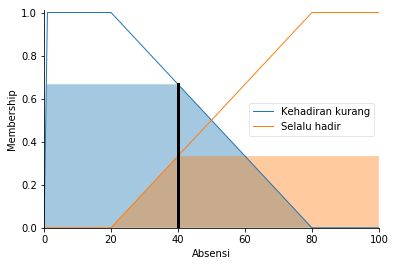

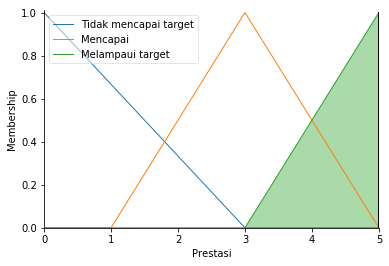

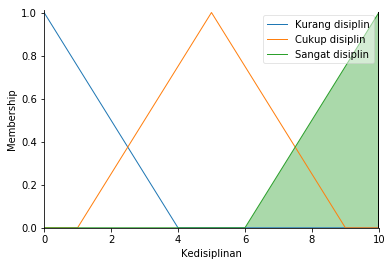

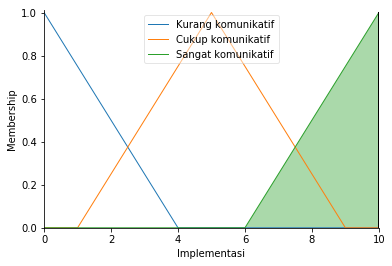

In [53]:
#membuat plot/grafik dari output dengan kondisi berada pada Output_rule yang telah terpenuhi
print(tipping.output['Output'])
Absensi.view(sim=tipping)
Prestasi.view(sim=tipping)
Kedisiplinan.view(sim=tipping)
Implementasi.view(sim=tipping)

Absensi_KehadiranKurang = (b - x) / (b - a)
                = (80 - 40) / (80 - 20)
                = 40 / 60
                = 0,6
                
Prestasi_MelampauiTarget = (x - b) / (b - a)
                         = (5 - 3) / (5 - 3)
                         = 2/2
                         = 1

Kedisiplinan_SangatDisiplin = (x - b) / (b - a)
                            = (10 - 6) / (10 - 6)
                            = 4/4
                            = 1

Implementasi_Sangat Komunikatif = (b - x) / (b - a)
                                = (10 - 6) / (10 - 6)
                                = 4/4
                                =1

#  Evaluasi RuleBase

IF Absensi_KehadiranKUrang AND Prestasi_MelampauiTarget AND Kedisiplinan_SangatDisiplin AND Implementasi_SangatKomunikatif THEN SedangDiperpanjang 

$$ \\ \alpha(predikat_1) = \mu Absensi_KehadiraKUrang \cap \mu Prestasi_MelampauiTarget \mu Kedisiplinan_SangatDisiplin \mu Implementasi_SangatKOmunikatif $$
$$\alpha(predikat_1)   = min (\mu Absensi_KehadiraKUrang \cap \mu Prestasi_MelampauiTarget \mu Kedisiplinan_SangatDisiplin \mu Implementasi_SangatKOmunikatif $$
[200]) $$
 = min (0,6) $$

# Aggregasi RuleBase 

SedangDiperpanjang = 
               0,6 = (x - 20) / (80 - 20)
               0,6 = (x - 20) / 40 
               24 = (x - 20)
               
               x = 44 



<div class="alert alert-info">
 <font size='5'> Defuzzyfikasi

5.503912363067292


E:\Anaconda\FILE\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


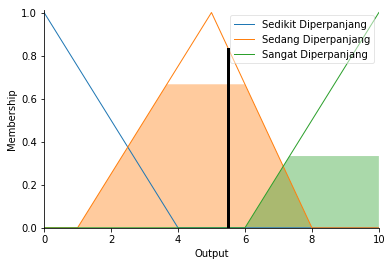

In [54]:
print(tipping.output['Output']) #mencetak output berdasarkan kondisi yang telah dipenuhi
Output.view(sim=tipping) #membuat plot/grafik dari output dengan kondisi berada pada Output_rule yang telah terpenuhi

Output = $$ \frac{\alpha X_1 \times A_1 +
\alpha X_2 \times A_2 +
\alpha X_3 \times A_3 +
\alpha X_4 \times A_4}
{\alpha A_1 + \alpha A_2 +
\alpha A_3 + \alpha A_4}$$

 $$Output = \frac{(3 \times 1.05) + (5 \times 1,4) + (4 \times 0,7) + (9 \times 0,6)}{1,05 + 1,4 + 0,7 + 0,6} $$
 
 $$ Output= \frac{18,35}{3.75} $$
 $$ Output= 4,9 \, $$

Hasil Output yang dikeluarkan menggunakan code python sebasar 5,5 sedangkan perhitungan manual sebasar 4,9. Terdapat perbedaan sebesar 0,6. 